In [1]:
#Import Libraries
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline                    

In [2]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
PassengerId=df_test["PassengerId"]

<Axes: xlabel='Embarked', ylabel='count'>

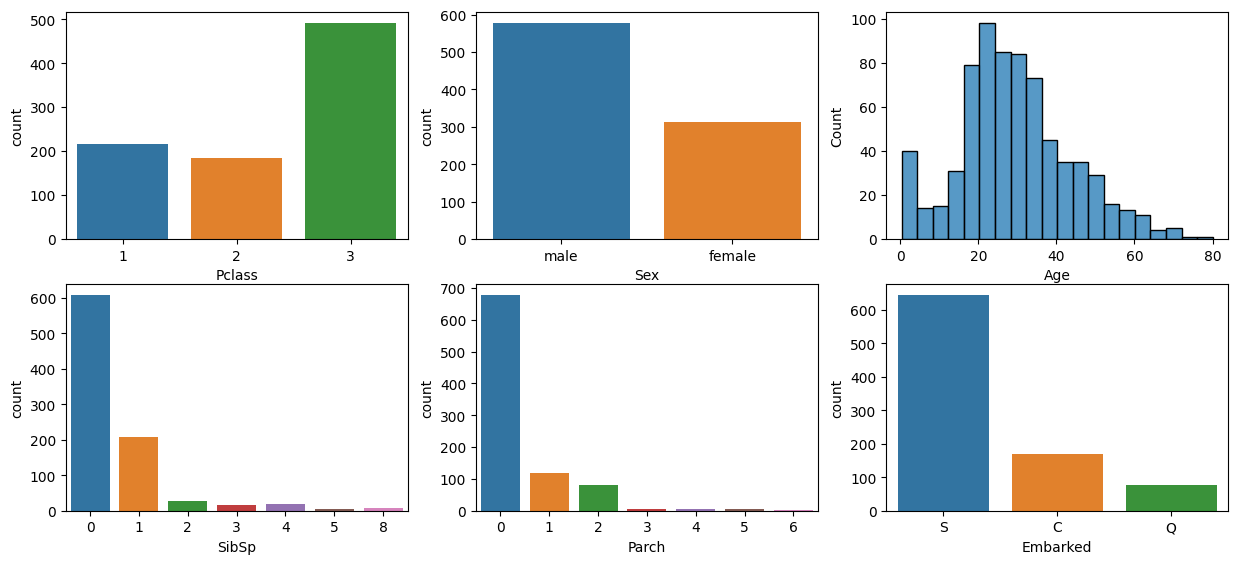

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.countplot(x='Pclass', data=df)

plt.subplot(3, 3, 2)
sns.countplot(x='Sex', data=df)

plt.subplot(3, 3, 3)
sns.histplot(x='Age', data=df)

plt.subplot(3, 3, 4)
sns.countplot(x='SibSp', data=df)

plt.subplot(3, 3, 5)
sns.countplot(x='Parch', data=df)

plt.subplot(3, 3, 6)
sns.countplot(x='Embarked', data=df)


<Axes: xlabel='Embarked', ylabel='count'>

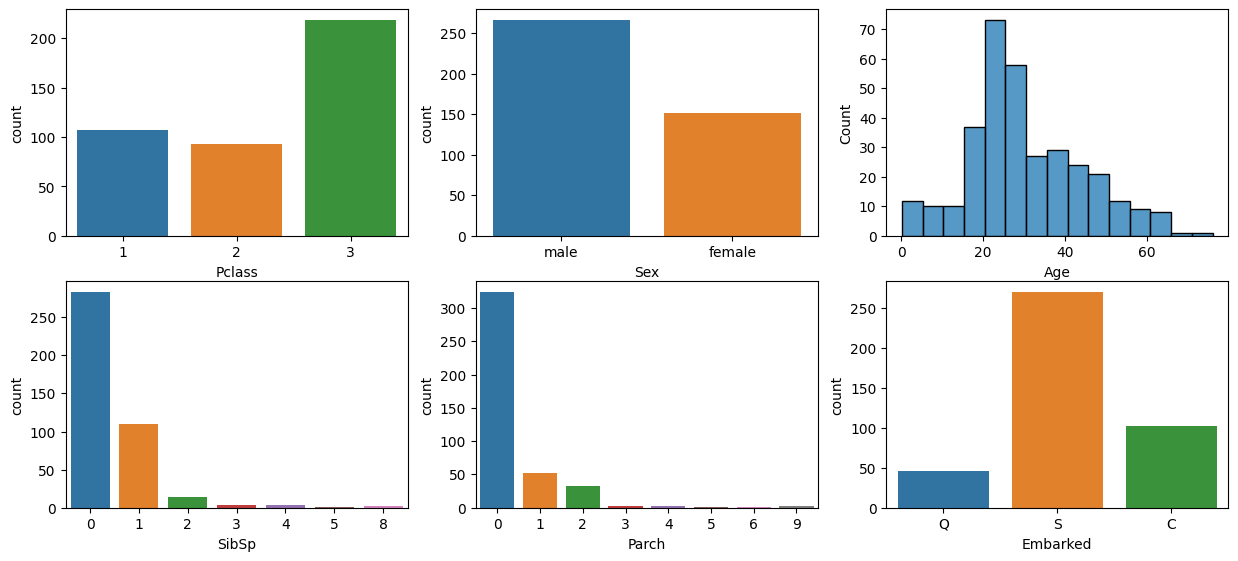

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.countplot(x='Pclass', data=df_test)

plt.subplot(3, 3, 2)
sns.countplot(x='Sex', data=df_test)

plt.subplot(3, 3, 3)
sns.histplot(x='Age', data=df_test)

plt.subplot(3, 3, 4)
sns.countplot(x='SibSp', data=df_test)

plt.subplot(3, 3, 5)
sns.countplot(x='Parch', data=df_test)

plt.subplot(3, 3, 6)
sns.countplot(x='Embarked', data=df_test)

In [15]:
DF = [df, df_test]

for df_temp in DF:
    # Drop specified columns from each DataFrame
    df_temp.drop(["PassengerId", "Cabin", "Ticket", "Name"], axis=1, inplace=True)

In [16]:
df.shape

(891, 8)

In [17]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
DF=[df,df_test]
for df_temp in DF:
    
    df_temp ["Sex"] = df_temp ["Sex"].map(
    {"female":0,"male":1})

    df_temp ["Embarked"] = df_temp ["Embarked"].map(
    {"S":0,"C":1,"Q":2})

In [19]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [20]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [21]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

<Axes: xlabel='Survived'>

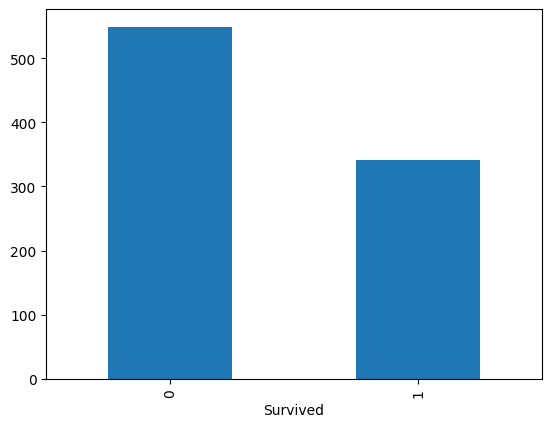

In [22]:
y.value_counts().plot(kind="bar")

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0


In [24]:
Features=X.columns

In [25]:
from sklearn.impute import SimpleImputer
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
DF=[X,df_test]
for df_temp in DF:
    # Impute missing values in place
    df_temp[:] = ImputedModule.fit_transform(df_temp)

In [26]:
DF=[X,df_test]
for df_temp in DF:
   
    scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
     
    df_temp[:] = scaler.fit_transform(df_temp)


In [27]:
X=pd.DataFrame(X,columns=Features)

In [28]:
X.shape

(891, 7)

In [29]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1,0.271174,0.125,0.0,0.014151,0.0
1,0.0,0,0.472229,0.125,0.0,0.139136,0.5
2,1.0,0,0.321438,0.000,0.0,0.015469,0.0
3,0.0,0,0.434531,0.125,0.0,0.103644,0.0
4,1.0,1,0.434531,0.000,0.0,0.015713,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
name=[]
score=[]

In [33]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=50,max_depth=3,random_state=33) #criterion can be also : entropy
name.append("RandomForestClassifierModel")
RandomForestClassifierModel.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
score.append(RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.826645264847512
RandomForestClassifierModel Test Score is :  0.7835820895522388


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=33)
name.append("GradientBoostingClassifierModel")
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
score.append(GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.8715890850722311
GBCModel Test Score is :  0.8134328358208955


In [35]:
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
name.append("GaussianNBModel")
GaussianNBModel.fit(X_train, y_train)
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))
score.append(GaussianNBModel.score(X_test, y_test))

GaussianNBModel Train Score is :  0.797752808988764
GaussianNBModel Test Score is :  0.7985074626865671


In [36]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
name.append("LogisticRegressionModel")
LogisticRegressionModel.fit(X_train, y_train)
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
score.append(LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)

LogisticRegressionModel Train Score is :  0.8041733547351525
LogisticRegressionModel Test Score is :  0.8022388059701493
LogisticRegressionModel Classes are :  [0 1]


In [37]:
from sklearn.linear_model import SGDClassifier
SGDClassifierModel = SGDClassifier(penalty='l2',learning_rate='optimal',random_state=33)
name.append("SGDClassifierModel")
SGDClassifierModel.fit(X_train, y_train)
#Calculating Details
print('SGDClassifierModel Train Score is : ' , SGDClassifierModel.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' , SGDClassifierModel.score(X_test, y_test))
score.append(SGDClassifierModel.score(X_test, y_test))
print('SGDClassifierModel loss function is : ' , SGDClassifierModel.loss_function_)
print('SGDClassifierModel No. of iteratios is : ' , SGDClassifierModel.n_iter_)

SGDClassifierModel Train Score is :  0.7913322632423756
SGDClassifierModel Test Score is :  0.7798507462686567
SGDClassifierModel loss function is :  <sklearn.linear_model._sgd_fast.Hinge object at 0x7a51e0fce670>
SGDClassifierModel No. of iteratios is :  58


In [38]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
name.append("DecisionTreeClassifierModel")
DecisionTreeClassifierModel.fit(X_train, y_train)
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
score.append(DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)

DecisionTreeClassifierModel Train Score is :  0.8314606741573034
DecisionTreeClassifierModel Test Score is :  0.8097014925373134
DecisionTreeClassifierModel Classes are :  [0 1]


In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
name.append("KNNClassifierModel")
KNNClassifierModel.fit(X_train, y_train)
#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))
score.append(KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8459069020866774
KNNClassifierModel Test Score is :  0.7910447761194029


In [40]:
from sklearn.svm import SVC
 
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
name.append("SVC")
SVCModel.fit(X_train, y_train)

print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
score.append(DecisionTreeClassifierModel.score(X_test, y_test))

SVCModel Train Score is :  0.7945425361155698
SVCModel Test Score is :  0.8059701492537313


In [41]:
Model=pd.DataFrame (name,columns = ['Model'])   
Test_Accuracy=pd.DataFrame (score,columns = ['Test_Accuracy'])   

In [42]:
pd.concat([Model,Test_Accuracy],axis=1)

,Model,Test_Accuracy
0,RandomForestClassifierModel,0.783582
1,GradientBoostingClassifierModel,0.813433
2,GaussianNBModel,0.798507
3,LogisticRegressionModel,0.802239
4,SGDClassifierModel,0.779851
5,DecisionTreeClassifierModel,0.809701
6,KNNClassifierModel,0.791045
7,SVC,0.809701


# *Using SVM*

In [43]:
prediction=SVCModel.predict(df_test)

In [44]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': prediction})
output.to_csv('/kaggle/working/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
